# Statistics

*Statistics* refers to the mathematics and techniques with which we understand data. We are obviously not trying to cover the field of Statistics in great depth in this class. But we will need some foundational understanding in order to proceed with the task of analyzing data later in the course.

## Describing a Single Set of Data

Now imagine that you work for a newly found start-up company that created a new social network platform for data scientists. The VP of Fundraising asks you for some sort of description of how many friends your members have so that he can include in his elevator pitches.

Now, one obvious description of any dataset is simply the data itself:

In [1]:
num_friends = [100,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,
               14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,
               10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,
               9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,
               7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,
               6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,
               5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,
               3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,
               2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
               1,1,1,1,1,1,1,1]

For a small enough dataset, this might even be the best description. But for a larger dataset, this is unwieldy and probably opaque. (Imagine staring at a list of 1 million numbers.) For that reason, we use statistics to distill and communicate relevant features of our data.

As a first approach, you put the friend counts into a histogram using `Counter` and `plt.bar`

friend_counts = Counter({6: 22, 1: 22, 4: 20, 3: 20, 9: 18, 5: 17, 2: 17, 10: 15, 7: 15, 8: 13, 15: 4, 13: 4, 21: 2, 19: 2, 18: 2, 14: 2, 12: 2, 100: 1, 49: 1, 41: 1, 40: 1, 25: 1, 16: 1, 11: 1})


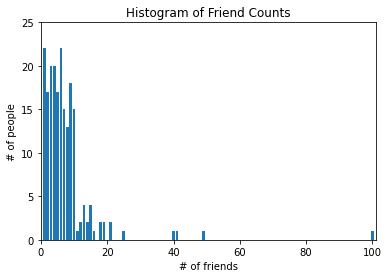

In [2]:
from collections import Counter
import matplotlib.pyplot as plt

friend_counts = Counter(num_friends)
print(f"friend_counts = {friend_counts}")
xs = range(101)                         # largest value is 100
ys = [friend_counts[x] for x in xs]     # height is just # of friends
plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

Unfortunately, this chart is still too difficult to slip into conversations. So you start generating some statistics. Probably the simplest statistic is the number of data points, which represents the number of users:

In [3]:
num_points = len(num_friends) # 204

print(f"number of users = {num_points}")

number of users = 204


You’re probably also interested in the largest and smallest values:

In [4]:
largest_value = max(num_friends)            # 100
smallest_value = min(num_friends)           # 1

print(f"largest_value = {largest_value}")
print(f"smallest_value = {smallest_value}")

largest_value = 100
smallest_value = 1


which are just special cases of wanting to know the values in specific positions:

In [5]:
sorted_values = sorted(num_friends)
print(f"sorted_values = {sorted_values}")

smallest_value = sorted_values[0]           # 1
second_smallest_value = sorted_values[1]    # 1
second_largest_value = sorted_values[-2]    # 49

print(f"smallest_value = {smallest_value}")
print(f"second_smallest_value = {second_smallest_value}")
print(f"second_largest_value = {second_largest_value}")

sorted_values = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 12, 12, 13, 13, 13, 13, 14, 14, 15, 15, 15, 15, 16, 18, 18, 19, 19, 21, 21, 25, 40, 41, 49, 100]
smallest_value = 1
second_smallest_value = 1
second_largest_value = 49


## Central Tendencies

Usually, we’ll want some notion of where our data is centered. Most commonly we’ll use the *mean* (or average), which is just the sum of the data divided by its count:

In [6]:
from typing import List

def mean(xs: List[float]) -> float:
    return sum(xs) / len(xs)

print(f"mean number of friends = {mean(num_friends)}")   # 7.333333

mean number of friends = 7.333333333333333


We’ll also sometimes be interested in the *median*, which is the middle-most value (if the number of data points is odd) or the average of the two middle-most values (if the number of data points is even).

For instance, if we have five data points in a sorted vector `x`, the median is `x[5 // 2]` or `x[2]`. If we have six data points, we want the average of `x[2]` (the third point) and `x[3]` (the fourth point).

Notice that—unlike the mean—the median doesn’t fully depend on every value in your data. For example, if you make the largest point larger (or the smallest point smaller), the middle points remain unchanged, which means so does the median.

Question: why does the government only report the *median* household income and never the *mean* household income?

We’ll write different functions for the even and odd cases and combine them:

In [7]:
# The underscores indicate that these are "private" functions, as they're intended to be called only by our median function.
def _median_odd(xs: List[float]) -> float:
    """If len(xs) is odd, the median is the middle element"""
    return sorted(xs)[len(xs) // 2]

def _median_even(xs: List[float]) -> float:
    """If len(xs) is even, it's the average of the middle two elements"""
    sorted_xs = sorted(xs)
    hi_midpoint = len(xs) // 2  # e.g. length 4 => hi_midpoint 2
    return (sorted_xs[hi_midpoint - 1] + sorted_xs[hi_midpoint]) / 2

def median(v: List[float]) -> float:
    """Finds the 'middle-most' value of v"""
    return _median_even(v) if len(v) % 2 == 0 else _median_odd(v)

In [8]:
print(median([1, 10, 2, 9, 5]))  # 5
print(median([1, 9, 2, 10]))     # (2 + 9) / 2 = 5.5

print(f"median number of friends = {median(num_friends)}")       # 6

5
5.5
median number of friends = 6.0


Clearly, the mean is simpler to compute, and it varies smoothly as our data changes. If we have `n` data points and one of them increases by some small amount `e`, then necessarily the mean will increase by `e / n`.

In order to find the median, however, we have to sort our data. And changing one of our data points by a small amount might change the median (if the changed data point is at the middle) or not at all.

At the same time, the mean is very sensitive to outliers in our data. If outliers are likely to be bad data (or otherwise unrepresentative of whatever phenomenon we’re trying to understand), then the mean can sometimes give us a misleading picture.

For example, the story is often told that in the mid-1980s, the major at the University of North Carolina with the highest average starting salary was geography, mostly because of NBA star (and outlier) Michael Jordan.

A generalization of the median is the *quantile*, which represents the value under which a certain percentile of the data lies (the median represents the value under which 50% of the data lies):

In [9]:
def quantile(xs: List[float], p: float) -> float:
    """Returns the pth-percentile value in x"""
    p_index = int(p * len(xs))
    return sorted(xs)[p_index]

In [10]:
print(quantile(num_friends, 0.10)) # 1
print(quantile(num_friends, 0.25)) # 3
print(quantile(num_friends, 0.50)) # the median
print(quantile(num_friends, 0.75)) # 9
print(quantile(num_friends, 0.90)) # 13

1
3
6
9
13


Less commonly you might want to look at the *mode*, or most common value(s):

In [11]:
def mode(x: List[float]) -> List[float]:
    """Returns a list, since there might be more than one mode"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
            if count == max_count]

In [12]:
print(f"mode number of friends = {mode(num_friends)}")

mode number of friends = [6, 1]


## Dispersion

*Dispersion* refers to measures of how spread out our data is. Typically they’re statistics for which values near zero signify *not spread out at all* and for which relatively large values signify *very spread out*.

For instance, a very simple measure is the *range*, which is just the difference between the largest and smallest elements:

In [13]:
# "range" already means something in Python, so we'll use a different name
def data_range(xs: List[float]) -> float:
    return max(xs) - min(xs)

In [14]:
print(data_range(num_friends)) # 99

99


The range is zero precisely when the `max` and `min` are equal, which can only happen if the elements of `x` are all the same, which means the data is as undispersed as possible.

Conversely, if the range is large, then the `max` is much larger than the `min` and the data is more spread out.

Like the median, the range doesn’t really depend on the whole dataset. A dataset whose points are all either 0 or 100 has the same range as a dataset whose values are 0, 100, and lots of 50s. But it seems like the first dataset “should” be more spread out.

A more complex measure of dispersion is the *variance*, which is computed as:

In [15]:
# to make things simple, place Week02TR.py in the same directory as this file
print("*********** Ignore any output below. They are from our work last week ***********")
from Week02TR import sum_of_squares
print("*********** Ignore any output above. They are from our work last week ***********")

def de_mean(xs: List[float]) -> List[float]:
    """Translate xs by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(xs)
    return [x - x_bar for x in xs]

def variance(xs: List[float]) -> float:
    """Almost the average squared deviation from the mean"""
    assert len(xs) >= 2, "variance requires at least two elements"

    n = len(xs)
    deviations = de_mean(xs)
    return sum_of_squares(deviations) / (n - 1)

*********** Ignore any output below. They are from our work last week ***********
[5, 7, 9]
[1, 2, 3]
[16, 20]
[2, 4, 6]
[3.0, 4.0]
32
14
5.0
5.0
5.0
[[1, 2, 3], [4, 5, 6]]
[[1, 2], [3, 4], [5, 6]]
(2, 3)
[4, 5, 6]
[2, 5]
[[1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [0, 0, 0, 0, 1]]
[4, 6, 7]
*********** Ignore any output above. They are from our work last week ***********


In [16]:
print(f"variance = {variance(num_friends)}")

variance = 81.54351395730716


Now, whatever units our data is in (e.g., “friends”), all of our measures of central tendency are in that same unit. The range will similarly be in that same unit. The variance, on the other hand, has units that are the square of the original units (e.g., “friends squared”). As it can be hard to make sense of these, we often look instead at the standard deviation:

In [17]:
import math

def standard_deviation(xs: List[float]) -> float:
    """The standard deviation is the square root of the variance"""
    return math.sqrt(variance(xs))

In [18]:
print(f"standard deviation = {standard_deviation(num_friends)}")

standard deviation = 9.03014473623248


Both the range and the standard deviation have the same outlier problem that we saw earlier for the mean. If our friendliest user had 200 friends instead of 100, the standard deviation would be 14.89—more than 60% higher!

A more robust alternative computes the difference between the 75th percentile value and the 25th percentile value:

In [19]:
def interquartile_range(xs: List[float]) -> float:
    """Returns the difference between the 75%-ile and the 25%-ile"""
    return quantile(xs, 0.75) - quantile(xs, 0.25)

In [20]:
print(f"IQR = {interquartile_range(num_friends)}")

IQR = 6
